In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
class create_cartoon:
    def __init__(self, filename, line_size = 9, blur_value = 7, k=12):
        self.img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
        print('<<image loaded, current shape: {}>>'.format(self.img.shape))
        self.line_size = 9
        self.blur_value = 7
        self.k = 9
    def edge_mask(self):
        gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.medianBlur(gray, self.blur_value)
        edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, self.line_size, self.blur_value)
        return edges
    
    def color_quantization(self):
        # transform image
        data = np.float32(self.img).reshape((-1,3))

        # determine criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

        # Implementing K-means
        ret, label, center = cv2.kmeans(data, self.k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        result = center[label.flatten()]
        result = result.reshape(self.img.shape)
        blurred = cv2.bilateralFilter(result, d = 5, sigmaColor = 50, sigmaSpace = 200)
        return blurred
    def output(self):
        blurred = create_cartoon.color_quantization(self)
        edges = create_cartoon.edge_mask(self)
        cartoon = cv2.bitwise_and(blurred, blurred, mask = edges)
        fig, axs = plt.subplots(2, figsize = [15,15])
        fig.suptitle('original image vs cartoon image')
        axs[0].imshow(self.img)
        axs[1].imshow(cartoon)
        print('<<done>>')
    

In [40]:
imgfolder = 'test_imgs/'
imgname = 'test.jpeg'
filename = imgfolder + imgname
output = create_cartoon(filename)


<<image loaded, current shape: (1365, 2048, 3)>>


<<done>>


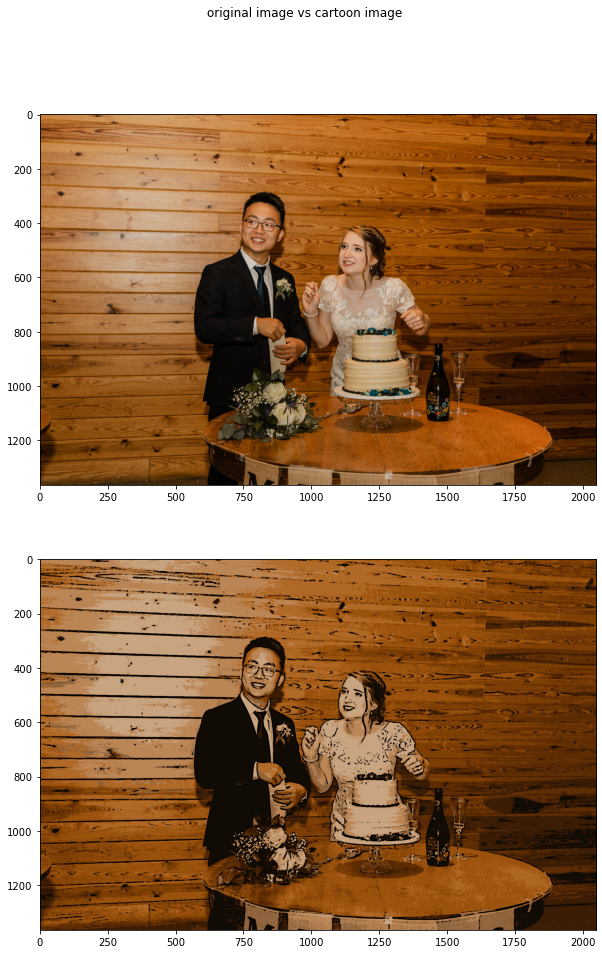

In [41]:
output.output()